In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load in scraped data csv and describe()
#### - The max Opening Box Office(Box_office_opening) recorded for a WB film was roughly:     $166,007,300

#### - The max Total Box Office(Box_office) recorded for a WB film was roughly:    $1,148,000,000

#### - The mean Total Box Office return is $149,957,100 with a standard deviation of ~25 Million

In [89]:
df = pd.read_csv('./WB_movie_data_cleaned.csv')
df.describe()

,Release_month,Running_time_min,Budget,Box_office_opening,Box_office
count,594.000000,589.000000,4.500000e+02,4.350000e+02,4.560000e+02
mean,6.939394,110.689304,5.941151e+07,2.066370e+07,1.499571e+08
std,3.383777,20.539581,5.315183e+07,2.512362e+07,2.057742e+08
min,1.000000,40.000000,7.000000e+04,5.760000e+02,5.082000e+04
25%,4.000000,98.000000,2.500000e+07,5.325306e+06,2.492500e+07
50%,7.000000,108.000000,4.000000e+07,1.311623e+07,7.135000e+07
75%,10.000000,121.000000,8.000000e+07,2.646477e+07,1.762750e+08
max,12.000000,219.000000,3.000000e+08,1.660073e+08,1.148000e+09




## 	**Create correlation heatmap for relevant indicators**
#### - Production Budget(Budget), Total Box Office(Box_office), and Opening Box Office(Box_office_opening) all highly correlated.
#### - Run time(Running_time_min) correlates most with Production Budget but not much with other variables.



<AxesSubplot:>

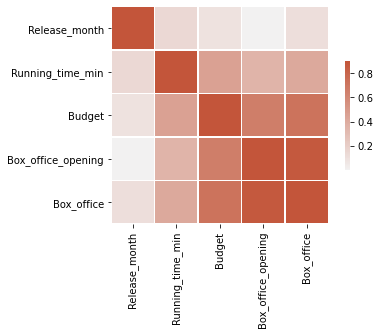

In [90]:
# create correlation matrix
corr_matrix = df[['Release_month', 'Running_time_min', 'Budget', 'Box_office_opening', 'Box_office']].corr()

# create dataframe correlation heatmap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Aggregate values for each relevant indicator
#### - Sandra Bullock and Daniel Radcliffe have the most lead actor credits in a WB film with 9 and 8 respectively.
#### - George Clooney, Ben Affleck, and Leonardo Dicaprio are close behind with 7 each

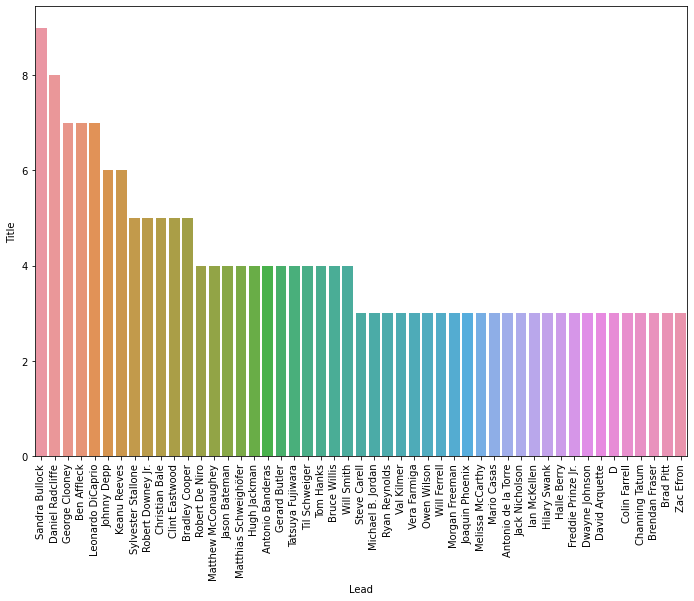

In [91]:
# select actors who appeared in a WB movie more than 2 times
actors_freq = df.groupby('Lead').count()
actors = actors_freq[actors_freq['Title'] > 2]
actors = actors[['Title']].sort_values(by=['Title'], ascending=False)

# create seaborn barplot with x = actors, y = #of occurences
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
chart = sns.barplot(x=actors.index, y=actors['Title'], ax=ax)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()
